In [ ]:
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [ ]:
# Neural Network Model Definition
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Definisci una trasformazione per convertire le immagini in tensori PyTorch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Scarica il dataset di training e di test di MNIST
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Definisci la dimensione del validation set
validation_size = 5000

# Dividi il dataset di training
train_dataset, validation_dataset = random_split(train_dataset, [len(train_dataset) - validation_size, validation_size])

100%|██████████| 9.91M/9.91M [00:00<00:00, 21.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 611kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.64MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.78MB/s]


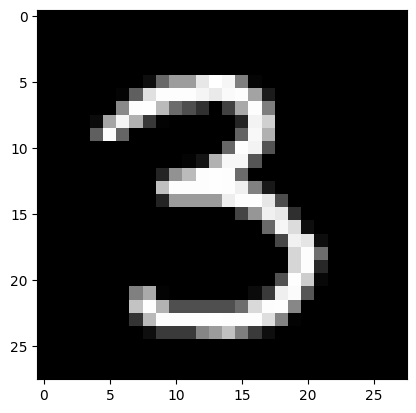

In [ ]:
plt.imshow(train_dataset[0][0][0], cmap='gray')

In [ ]:
# Crea i DataLoader per i dataset di training, validation e test
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Crea un'istanza del modello, dell'ottimizzatore e della funzione di perdita
model = DigitClassifier()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.NLLLoss()

# Definisci il numero di epoche
epochs = 4

# Ciclo di training
for epoch in range(epochs):
    # Fase di training
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch + 1, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

    # Fase di validation
    model.eval()
    validation_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in validation_loader:
            output = model(data)
            validation_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    validation_loss /= len(validation_loader.dataset)

    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        validation_loss, correct, len(validation_loader.dataset),
        100. * correct / len(validation_loader.dataset)))

# Fase di test (eseguila dopo il training)
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()  # sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Train Epoch: 1 [0/55000 (0%)]	Loss: 2.313584
Train Epoch: 1 [6400/55000 (12%)]	Loss: 0.158748
Train Epoch: 1 [12800/55000 (23%)]	Loss: 0.089268
Train Epoch: 1 [19200/55000 (35%)]	Loss: 0.116722
Train Epoch: 1 [25600/55000 (47%)]	Loss: 0.045916
Train Epoch: 1 [32000/55000 (58%)]	Loss: 0.199902
Train Epoch: 1 [38400/55000 (70%)]	Loss: 0.040724
Train Epoch: 1 [44800/55000 (81%)]	Loss: 0.073487
Train Epoch: 1 [51200/55000 (93%)]	Loss: 0.017801

Validation set: Average loss: 0.0011, Accuracy: 4891/5000 (98%)

Train Epoch: 2 [0/55000 (0%)]	Loss: 0.025259
Train Epoch: 2 [6400/55000 (12%)]	Loss: 0.014899
Train Epoch: 2 [12800/55000 (23%)]	Loss: 0.025683
Train Epoch: 2 [19200/55000 (35%)]	Loss: 0.023269
Train Epoch: 2 [25600/55000 (47%)]	Loss: 0.012104
Train Epoch: 2 [32000/55000 (58%)]	Loss: 0.097596
Train Epoch: 2 [38400/55000 (70%)]	Loss: 0.083867
Train Epoch: 2 [44800/55000 (81%)]	Loss: 0.023172
Train Epoch: 2 [51200/55000 (93%)]	Loss: 0.017209

Validation set: Average loss: 0.0006, Accurac

In [ ]:
torch.save(model.state_dict(), 'mnist_model.pth')


tensor([0, 0, 0, 0, 0, 0, 6, 0, 0, 0])
6


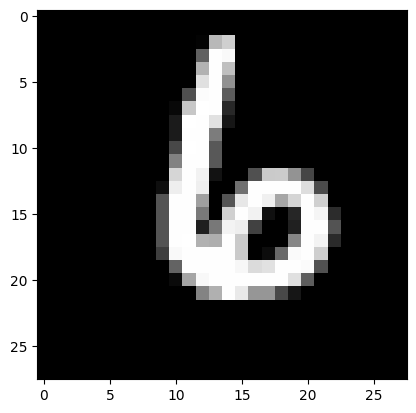

In [ ]:
model.eval()
n = np.random.randint(0, len(test_dataset))
plt.imshow(test_dataset[n][0][0], cmap='gray')
out = model(test_dataset[n][0])[0].detach()
v = torch.arange(len(out))
print((torch.max(out) == out)*v)
print(test_dataset[n][1])